In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# 한글 깨짐 방지 코드
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [6]:
df1=pd.read_csv('pd_data/acute_deathPlace.csv')

In [26]:
df1

,Unnamed: 0,지역별(1),주택,의료기관,사회복지시설,공공시설,도로,상업서비스시설,산업장,농장,병원이송중,기타
0,1,서울,15,686,8,0,1,1,2,0,1,5
1,2,부산,8,234,1,0,0,0,0,0,0,0
2,3,대구,8,182,0,0,1,0,0,0,0,0
3,4,인천,10,213,3,2,0,0,0,0,0,1
4,5,광주,2,109,0,0,0,0,0,0,0,1
5,6,대전,4,84,1,0,0,0,0,0,1,0
6,7,울산,1,53,0,0,0,0,0,0,0,0
7,8,세종,0,12,0,0,0,0,0,0,0,0
8,9,경기,26,793,10,0,1,0,0,0,2,4
9,10,강원,5,162,0,0,0,0,0,0,0,2


In [7]:
df2=pd.read_csv('pd_data/acute_traffic.csv')

In [28]:
df2

,Unnamed: 0,지역별(1),119구급차,의료기관구급차,기타구급차,경찰차등공공차량,항공이송,기타자동차,도보,기타
0,1,서울,2760,103,979,3,4,3378,77,26
1,2,부산,818,39,537,-,2,963,16,2
2,3,대구,779,311,388,1,2,1117,24,-
3,4,인천,859,39,327,3,17,835,2,1
4,5,광주,412,758,301,-,2,619,42,5
5,6,대전,570,84,136,1,1,578,1,-
6,7,울산,155,15,122,-,1,217,3,-
7,8,경기,3225,125,1316,9,9,3527,38,13
8,9,강원,542,87,448,1,37,763,4,2
9,10,충북,370,41,117,-,-,357,6,2


In [31]:
df2['항공이송'] = pd.to_numeric(df2['항공이송'], errors='coerce')

In [36]:
df2['항공이송'].replace(np.NaN, 0, inplace=True)

In [37]:
df2

,Unnamed: 0,지역별(1),119구급차,의료기관구급차,기타구급차,경찰차등공공차량,항공이송,기타자동차,도보,기타
0,1,서울,2760,103,979,3,4.0,3378,77,26
1,2,부산,818,39,537,-,2.0,963,16,2
2,3,대구,779,311,388,1,2.0,1117,24,-
3,4,인천,859,39,327,3,17.0,835,2,1
4,5,광주,412,758,301,-,2.0,619,42,5
5,6,대전,570,84,136,1,1.0,578,1,-
6,7,울산,155,15,122,-,1.0,217,3,-
7,8,경기,3225,125,1316,9,9.0,3527,38,13
8,9,강원,542,87,448,1,37.0,763,4,2
9,10,충북,370,41,117,-,0.0,357,6,2


In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  16 non-null     int64  
 1   지역별(1)      16 non-null     object 
 2   119구급차      16 non-null     int64  
 3   의료기관구급차     16 non-null     int64  
 4   기타구급차       16 non-null     int64  
 5   경찰차등공공차량    16 non-null     object 
 6   항공이송        16 non-null     float64
 7   기타자동차       16 non-null     int64  
 8   도보          16 non-null     object 
 9   기타          16 non-null     object 
dtypes: float64(1), int64(5), object(4)
memory usage: 1.4+ KB


In [39]:
df3 =pd.merge(df1,df2, on='지역별(1)', how='outer').corr()

In [40]:
df3.columns

Index(['Unnamed: 0_x', '주택', '의료기관', '사회복지시설', '공공시설', '도로', '상업서비스시설', '산업장',
       '농장', '병원이송중', '기타_x', 'Unnamed: 0_y', '119구급차', '의료기관구급차', '기타구급차',
       '항공이송', '기타자동차'],
      dtype='object')

In [41]:
df2.의료기관구급차.values

array([103,  39, 311,  39, 758,  84,  15, 125,  87,  41,  15,  59,  87,
        30,  69,  62], dtype=int64)

<AxesSubplot:>

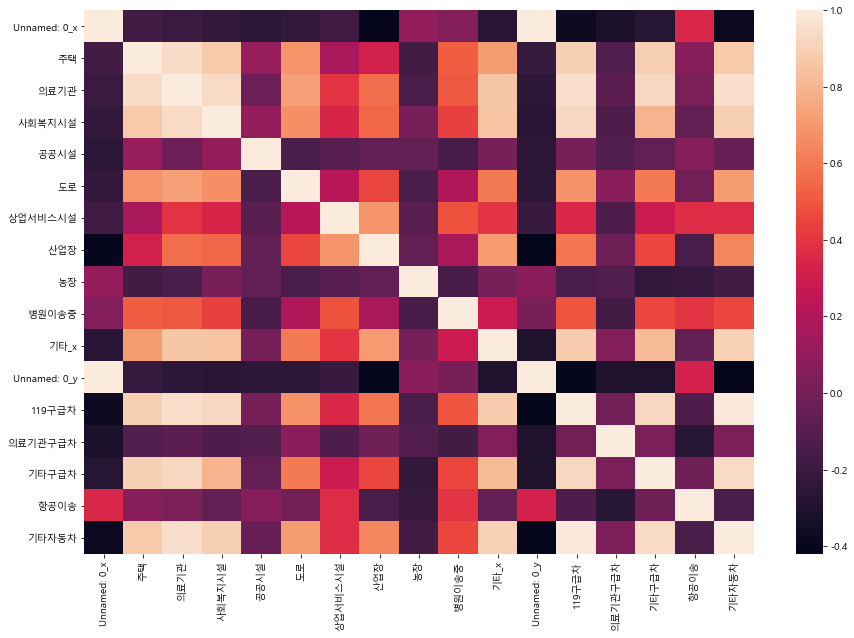

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(df3)